In [ ]:
import pandas as pd
import numpy as np
import datetime as dt #thư viện xử lý ngày tháng

In [ ]:
!pip install vnstock

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vnstock import * # nhập các hàm viết sẵn của thư viện vào workbook
 # thư viện này là thư viện dữ liệu chứng khoán trực tuyến của việt nam


Trong đó ý nghĩa các cột:

Open là giá mở cửa

High là giá cao nhất trong phiên giao dịch

Low: giá thấp nhất trong phiên

Close: giá đóng cửa (hay giá kết phiên)

Volume: khối lượng giao dịch (tổng số cổ phiếu giao dịch trong phiên)

TradingDate: thời gian

In [ ]:
start = "2020-01-01"
end = dt.datetime.now().strftime("%Y-%m-%d")# strftime là hàm định dạng đầu ra thời gian
company = "CTG" # ngân hàng công thương CTG
CTG = stock_historical_data(symbol= company, start_date= start, end_date= end)
CTG.set_index('TradingDate',inplace=True) # chuyển cột TradingDate thành cột index, khai báo inpalce để lưu lại thay đổi
CTG.head()
# Nhận thấy k có ngày 1 4,5 là ngày lễ và các ngày thứ 7, cn nên không có dữ liệu

,Open,High,Low,Close,Volume
TradingDate,,,,,
2020-01-02,15583.0,16217.0,15546.0,16031.0,4347610
2020-01-03,16180.0,16292.0,15844.0,15882.0,3626640
2020-01-06,15807.0,16180.0,15733.0,15919.0,3173480
2020-01-07,16105.0,16292.0,15994.0,16180.0,4163600
2020-01-08,16068.0,16515.0,15882.0,16143.0,9864300


In [ ]:
CTG.info()# thông tin tổng quát dữ liệu có 761 dòng 4 cột là kiểu dữ liệu số thực và 1 cột kiểu số nguyên cùng cột thời gian index định dạng Datetime

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 763 entries, 2020-01-02 to 2023-01-18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    763 non-null    float64
 1   High    763 non-null    float64
 2   Low     763 non-null    float64
 3   Close   763 non-null    float64
 4   Volume  763 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.8 KB


In [ ]:
# Ngân hàng Á châu – ACB
ACB = stock_historical_data(symbol= "ACB", start_date= start, end_date= end)
ACB.set_index('TradingDate',inplace=True)
ACB.head()

,Open,High,Low,Close,Volume
TradingDate,,,,,
2020-01-02,11224.0,11323.0,11175.0,11323.0,1163109
2020-01-03,11323.0,11421.0,11273.0,11323.0,1055528
2020-01-06,11323.0,11323.0,11076.0,11076.0,1286035
2020-01-07,11076.0,11175.0,11076.0,11076.0,1050934
2020-01-08,11076.0,11076.0,10830.0,10880.0,2304937


In [ ]:
ACB.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 758 entries, 2020-01-02 to 2023-01-18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    758 non-null    float64
 1   High    758 non-null    float64
 2   Low     758 non-null    float64
 3   Close   758 non-null    float64
 4   Volume  758 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.5 KB


In [ ]:
# ngân hàng ngoại thương –  VCB
VCB = stock_historical_data(symbol= "VCB", start_date= start, end_date= end)
VCB.set_index('TradingDate',inplace=True)
VCB.head()

,Open,High,Low,Close,Volume
TradingDate,,,,,
2020-01-02,69267.0,70189.0,68883.0,69728.0,386290
2020-01-03,70266.0,70496.0,69037.0,69037.0,536130
2020-01-06,68499.0,68730.0,67194.0,67194.0,880110
2020-01-07,66810.0,67501.0,65581.0,67424.0,1013270
2020-01-08,66733.0,67501.0,66195.0,66810.0,722280


In [ ]:
VCB.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 763 entries, 2020-01-02 to 2023-01-18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    763 non-null    float64
 1   High    763 non-null    float64
 2   Low     763 non-null    float64
 3   Close   763 non-null    float64
 4   Volume  763 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.8 KB


Tiếp theo, ta sẽ nối 3 dữ liệu trên thành 1 để phân tích

In [ ]:
list = ['CTG', 'ACB', 'VCB']
bank_stocks = pd.concat([CTG,ACB,VCB], axis= 1, keys= list) # các tham số gồm chuỗi dataframe cần nối, axit thể hiện hướng nối (0 là hàng 1 là cột), key là nối theo thứ tự đó
bank_stocks

CTG                                          ACB           \
                Open     High      Low    Close   Volume     Open     High   
TradingDate                                                                  
2020-01-02   15583.0  16217.0  15546.0  16031.0  4347610  11224.0  11323.0   
2020-01-03   16180.0  16292.0  15844.0  15882.0  3626640  11323.0  11421.0   
2020-01-06   15807.0  16180.0  15733.0  15919.0  3173480  11323.0  11323.0   
2020-01-07   16105.0  16292.0  15994.0  16180.0  4163600  11076.0  11175.0   
2020-01-08   16068.0  16515.0  15882.0  16143.0  9864300  11076.0  11076.0   
...              ...      ...      ...      ...      ...      ...      ...   
2023-01-12   29100.0  29200.0  28750.0  28900.0  2472390  24200.0  24650.0   
2023-01-13   29100.0  29200.0  28400.0  29100.0  2975396  24600.0  24800.0   
2023-01-16   29100.0  30000.0  28900.0  30000.0  5350309  24150.0  25000.0   
2023-01-17   30100.0  30650.0  30100.0  30600.0  3478411  25050.0  25450.0   
2023-01-18   30600.0  30850.0  30400.0  30750.0  3206460  25300.0  25700.0   

                                              VCB                             \
                 Low    Close     Volume     Open     High      Low    Close   
TradingDate                                                                    
2020-01-02   11175.0  11323.0  1163109.0  69267.0  70189.0  68883.0  69728.0   
2020-01-03   11273.0  11323.0  1055528.0  70266.0  70496.0  69037.0  69037.0   
2020-01-06   11076.0  11076.0  1286035.0  68499.0  68730.0  67194.0  67194.0   
2020-01-07   11076.0  11076.0  1050934.0  66810.0  67501.0  65581.0  67424.0   
2020-01-08   10830.0  10880.0  2304937.0  66733.0  67501.0  66195.0  66810.0   
...              ...      ...        ...      ...      ...      ...      ...   
2023-01-12   24200.0  24500.0  2883106.0  85200.0  85200.0  83800.0  84800.0   
2023-01-13   24150.0  24150.0  2156614.0  85200.0  86500.0  85200.0  85800.0   
2023-01-16   24150.0  25000.0  3541375.0  86000.0  88500.0  86000.0  87300.0   
2023-01-17   24950.0  25300.0  3988618.0  88500.0  89400.0  87300.0  89400.0   
2023-01-18   25100.0  25500.0  5439101.0  90000.0  91000.0  89400.0  90000.0   

                      
              Volume  
TradingDate           
2020-01-02    386290  
2020-01-03    536130  
2020-01-06    880110  
2020-01-07   1013270  
2020-01-08    722280  
...              ...  
2023-01-12   1879784  
2023-01-13    822866  
2023-01-16    737007  
2023-01-17    645550  
2023-01-18    836046  

[763 rows x 15 columns]

Ta sẽ đặt tên cho các cột

In [ ]:
bank_stocks.columns.names = ['Bank Name','Stock Info']
bank_stocks

Bank Name        CTG                                          ACB           \
Stock Info      Open     High      Low    Close   Volume     Open     High   
TradingDate                                                                  
2020-01-02   15583.0  16217.0  15546.0  16031.0  4347610  11224.0  11323.0   
2020-01-03   16180.0  16292.0  15844.0  15882.0  3626640  11323.0  11421.0   
2020-01-06   15807.0  16180.0  15733.0  15919.0  3173480  11323.0  11323.0   
2020-01-07   16105.0  16292.0  15994.0  16180.0  4163600  11076.0  11175.0   
2020-01-08   16068.0  16515.0  15882.0  16143.0  9864300  11076.0  11076.0   
...              ...      ...      ...      ...      ...      ...      ...   
2023-01-12   29100.0  29200.0  28750.0  28900.0  2472390  24200.0  24650.0   
2023-01-13   29100.0  29200.0  28400.0  29100.0  2975396  24600.0  24800.0   
2023-01-16   29100.0  30000.0  28900.0  30000.0  5350309  24150.0  25000.0   
2023-01-17   30100.0  30650.0  30100.0  30600.0  3478411  25050.0  25450.0   
2023-01-18   30600.0  30850.0  30400.0  30750.0  3206460  25300.0  25700.0   

Bank Name                                     VCB                             \
Stock Info       Low    Close     Volume     Open     High      Low    Close   
TradingDate                                                                    
2020-01-02   11175.0  11323.0  1163109.0  69267.0  70189.0  68883.0  69728.0   
2020-01-03   11273.0  11323.0  1055528.0  70266.0  70496.0  69037.0  69037.0   
2020-01-06   11076.0  11076.0  1286035.0  68499.0  68730.0  67194.0  67194.0   
2020-01-07   11076.0  11076.0  1050934.0  66810.0  67501.0  65581.0  67424.0   
2020-01-08   10830.0  10880.0  2304937.0  66733.0  67501.0  66195.0  66810.0   
...              ...      ...        ...      ...      ...      ...      ...   
2023-01-12   24200.0  24500.0  2883106.0  85200.0  85200.0  83800.0  84800.0   
2023-01-13   24150.0  24150.0  2156614.0  85200.0  86500.0  85200.0  85800.0   
2023-01-16   24150.0  25000.0  3541375.0  86000.0  88500.0  86000.0  87300.0   
2023-01-17   24950.0  25300.0  3988618.0  88500.0  89400.0  87300.0  89400.0   
2023-01-18   25100.0  25500.0  5439101.0  90000.0  91000.0  89400.0  90000.0   

Bank Name             
Stock Info    Volume  
TradingDate           
2020-01-02    386290  
2020-01-03    536130  
2020-01-06    880110  
2020-01-07   1013270  
2020-01-08    722280  
...              ...  
2023-01-12   1879784  
2023-01-13    822866  
2023-01-16    737007  
2023-01-17    645550  
2023-01-18    836046  

[763 rows x 15 columns]

In [ ]:
# Để truy xuất dữ liệu trong index đa cấp(CTG,ACB,VCB) ta sẽ dùng hàm xs()
bank_stocks.xs(key= 'Close', axis= 1, level= 'Stock Info').max() # lấy ra giá trị đóng cửa lớn nhất của từng cổ phiếu trên

Bank Name
CTG    41142.0
ACB    30360.0
VCB    95800.0
dtype: float64

tính tỉ suất lợi nhuận dựa trên công thức sau:
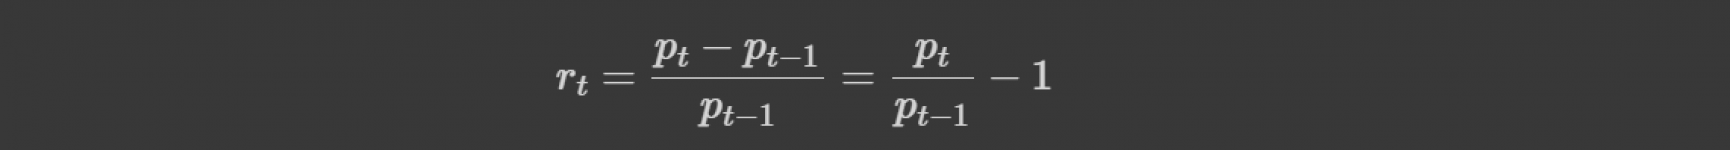

Tương ứng với (giá đóng cửa hiện tại – giá đóng cửa ngày trước đó)/giá đóng cửa ngày trước đó

Tỷ suất lợi nhuận càng cao, thì cổ phiếu càng nổi bật, khả năng sinh lời nhiều.



In [ ]:
value_banks = pd.DataFrame() # ta tạo 1 dataframe để lưu giá trị tỷ suất lợi nhuận

Tạo một vòng lặp for để lặp qua với mỗi mã cổ phiếu ngân hàng

Tiếp theo, ta tạo một cột tên là “mã cổ phiếu + value_bank” và gán cho nó bằng với giá trị tỷ suất lợi nhuận

Để tính tỷ suất lợi nhuận, ta dùng hàm pct_change() trong pandas và áp dụng cho giá đóng cửa cửa từng mã cổ phiếu.

Phương thức .pct_change() để tính toán thay đổi % theo thời gian. Sự thay đổi này được tính (giá trị row hiện tại – giá trị row trước đó)/ (giá trị row trước đó).

In [ ]:
for name in list:
   value_banks[name + ' value_bank'] = bank_stocks[name]['Close'].pct_change()
value_banks.head()


,CTG value_bank,ACB value_bank,VCB value_bank
TradingDate,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,-0.009294,0.000000,-0.009910
2020-01-06,0.002330,-0.021814,-0.026696
2020-01-07,0.016396,0.000000,0.003423
2020-01-08,-0.002287,-0.017696,-0.009107


dòng đầu tiên không có dữ liệu để tính nên trả về giá trị NaN, ta có thể xóa luôn dòng này

In [ ]:
value_banks.dropna(inplace= True) # hàm dropna dùng để loại bỏ các dữ liệu missing data
value_banks

,CTG value_bank,ACB value_bank,VCB value_bank
TradingDate,,,
2020-01-03,-0.009294,0.000000,-0.009910
2020-01-06,0.002330,-0.021814,-0.026696
2020-01-07,0.016396,0.000000,0.003423
2020-01-08,-0.002287,-0.017696,-0.009107
2020-01-09,0.036920,0.013511,0.019533
...,...,...,...
2023-01-12,-0.006873,0.012397,-0.003525
2023-01-13,0.006920,-0.014286,0.011792
2023-01-16,0.030928,0.035197,0.017483


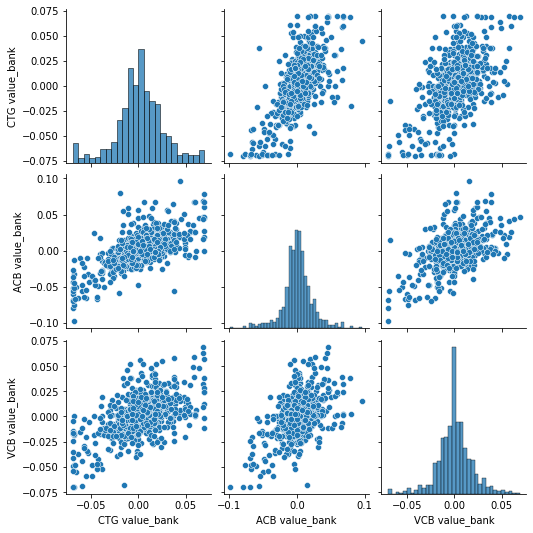

In [ ]:
#
import seaborn as sns
sns.pairplot(value_banks)

Vẽ biểu đồ phân phối chuẩn lợi nhuận cổ phiếu ACB vào năm 2020



<Figure size 1080x360 with 0 Axes>

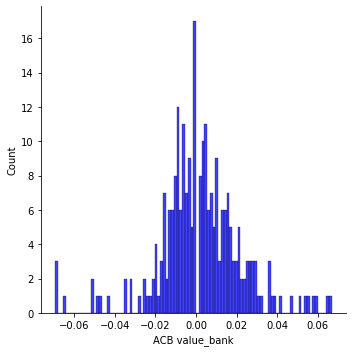

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5)) # tùy chỉnh kích thước biểu đồ
sns.displot(value_banks.loc['2021-01-01':'2021-12-31']['ACB value_bank'],color= 'blue', bins= 100)

Lấy giá đóng cửa các cổ phiếu trên bằng biểu đồ matplotlib



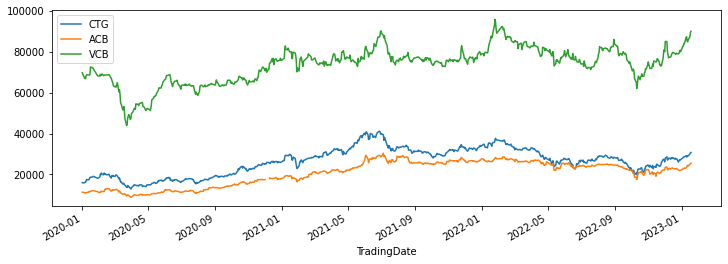

In [ ]:
# ta dùng vòng for để lặp qua Data frame các cổ phiếu trên
for tick in list:
  bank_stocks[tick]['Close'].plot(figsize= (12,4), label= tick)
plt.legend()


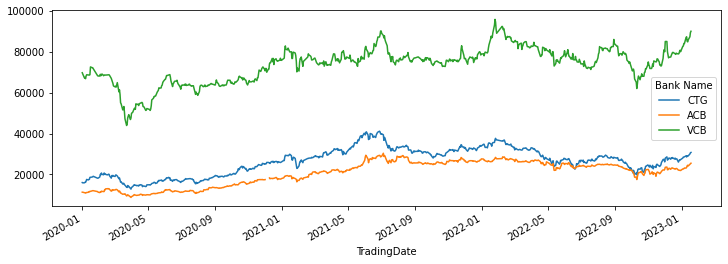

In [ ]:
# ta dùng hàm xs() để lấy từng mã cổ phiếu
bank_stocks.xs(key= 'Close',axis=1, level= 'Stock Info').plot(figsize =(12,4))

Đường trung bình động – MA

Đường MA (hay còn gọi là Moving Average) là đường trung bình động, thể hiện biến động, chỉ báo xu hướng của giá cổ phiếu trong một khoảng thời gian. Mục đích chính của đường MA là theo dõi giá đang vận động theo xu hướng tăng hoặc giảm hay không có xu hướng

Vẽ đường trung bình động và giá đóng cửa cổ phiếu ACB bằng Matplotlib



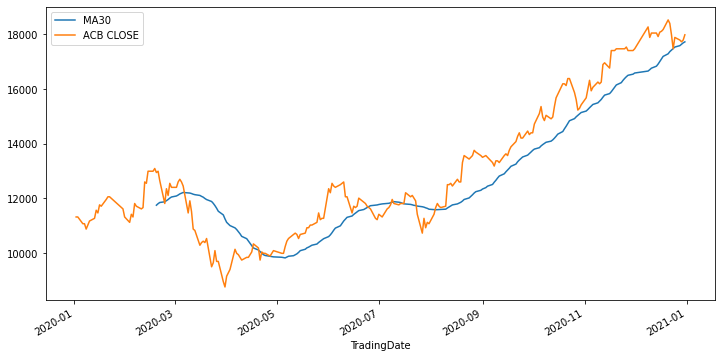

In [ ]:
plt.figure(figsize=(12,6))
ACB['Close'].loc['2020-01-01':'2021-01-01'].rolling(window=30).mean().plot(label='MA30')
ACB['Close'].loc['2020-01-01':'2021-01-01'].plot(label='ACB CLOSE')
plt.legend()

Dùng bản đồ nhiệt (Heatmap) để xem độ tương quan giá đóng cửa của các cổ phiếu trên



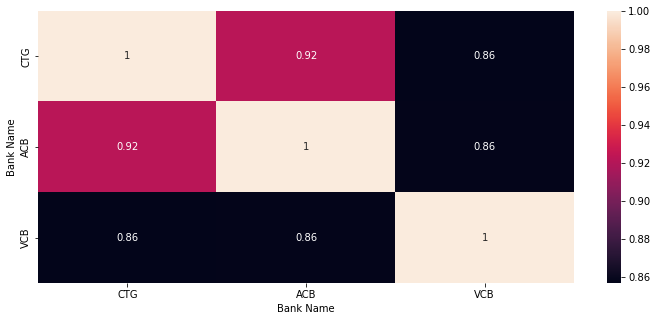

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True) # hàm corr cho thấy sự tương quan giữa các cột ví dụ ACB tăng thì CTG cũng tăng

Sử dụng Seaborn Clustermap để nhóm các cổ phiếu có tương quan với nhau



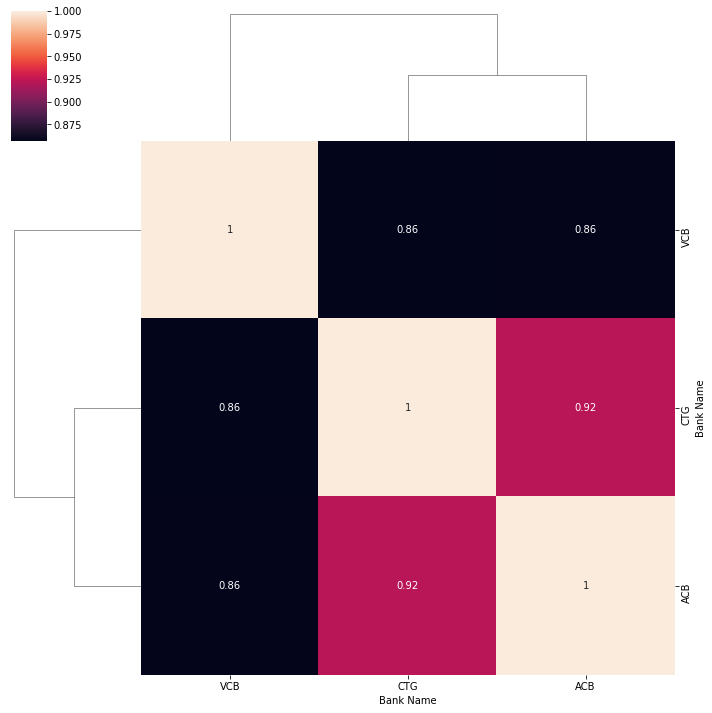

In [ ]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

Sử dụng thư viện cufflinks – plotly để trực quan tương tác với biểu đồ



In [ ]:
!pip install cufflinks
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cufflinks as cf
cf.go_offline()
# Để hiển thị trên google colab ta import thêm plotly như bên dưới
import plotly.io as pio
pio.renderers.default = "colab"

Vẽ biểu đồ thể hiện giá đóng cửa của các mã cổ phiếu trên bằng cufflinks



In [ ]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot(title = "Giá đóng cửa",
                                                            xTitle = "Năm", yTitle = "Giá")

Đường SMA là gì? Đường Simple Moving Average (SMA): là đường trung bình động đơn giản được tính bằng trung bình cộng các mức giá đóng cửa trong một khoảng thời gian giao dịch nhất định.

Vẽ đường SMA 7, 14, 21 cổ phiếu CTG



In [ ]:
CTG['Close'].loc['2020-01-01':'2021-01-01'].ta_plot(study='sma',periods=[7,14,21],title='SMA CTG')

Vẽ dãi bollinger đơn giản cổ phiếu VCB trong năm 2020(giá trị dùng giới hạn giá trị tăng giảm cổ phiếu đơn giản là đường close sẽ luôn nằm trong giải này)



In [ ]:
VCB['Close'].loc['2020-01-01':'2021-01-01'].ta_plot(study='boll')

Vẽ biểu đồ hình nến mã chứng khoán ACB để phân tích kỹ thuật



Biểu đồ hình nến đơn giản từ năm 2020 mã chứng khoán ACB



In [ ]:
ACB[['Open', 'High', 'Low', 'Close']].loc['2020-01-01':'2021-01-01'].iplot(kind='candle')

In [ ]:
cf.datagen.ohlc()
acb_plot = cf.QuantFig(ACB,title = 'Biểu đồ hình nến',legend = "Top", name = "Nến")
acb_plot.add_bollinger_bands(colors =["red", 'green'])
acb_plot.iplot()

Thêm vào các chỉ số phân tích kỹ thuật khác của mã chứng khoán ACB



In [ ]:
acb_plot.add_sma([10,20],width=2,color=['green','lightgreen'],legendgroup=True)
acb_plot.add_rsi(periods=20,color='java')
acb_plot.add_bollinger_bands(periods=20,boll_std=2,colors=['magenta','grey'],fill=True)
acb_plot.add_volume()
acb_plot.add_macd()
acb_plot.iplot()